#### Importação das bibliotecas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Carregamento dos dados

In [2]:
dataframe = pd.read_excel(io="/home/nophaieviscente/eebii/data/xlsx/TABULACAO_MATEMATICA.xlsx", sheet_name="BANCO DE DADOS")

#### Criação de um dicionário de dados

In [3]:
responsavel_familiar = {
    "PAI E MÂE" : 0,
    "PAI": 1,
    "MÃE": 2,
    "IRMÃOS": 3,
    "AVÓS": 4,
    "PARENTES": 5,
    "COMPANHEIRO(A)": 6,
    "OUTROS": 7
}

grau_escolaridade = {
    "NENHUM": 1,
    "1º AO 5º ANO": 2,
    "6º AO 9º ANO": 3,
    "ENSINO MÉDIO": 4,
    "ENSINO SUPERIOR": 5
}

tipo_moradia = {
    "RESIDÊNCIA CEDIDA": 1,
    "RESIDÊNCIA ALUGADA": 2,
    "RESIDÊNCIA PROPRIA": 3
}

qtd_pessoas_casa = {
    "DUAS": 1,
    "TRÊS": 2,
    "QUATRO": 3,
    "CINCO": 4,
    "SEIS OU MAIS": 5
}

qtd_irmaos = {
    "NENHUM": 1,
    "UM": 2,
    "DOIS": 3,
    "TRÊS": 4,
    "QUATRO OU MAIS": 5
}

faixa_de_renda = {
    "MENOS DE MIL (R$)": 1,
    "DE MIL A DOIS MIL (R$)": 2,
    "DE DOIS MIL A TRÊS MIL (R$)": 3,
    "DE TRÊS MIL A QUATRO MIL (R$)": 4,
    "DE QUATRO MIL A CINCO MIL (R$)": 5,
    "DE CINCO MIL A SEIS MIL (R$)": 6,
    "ACIMA DE SEIS MIL (R$)": 7
}

#### Criação das funções de visualização

In [4]:
def plot_data (dataframe:pd.DataFrame, column_to_plot:str, dict_map:dict, title:str) -> plt :

    dict_reverse = {v:k for k,v in dict_map.items()}

    labels = [ dict_reverse.get(value) for value in dataframe[column_to_plot].value_counts().keys()]

    plt.figure(figsize=(6,8))
    plt.pie(
        x=dataframe[column_to_plot].value_counts().values,
        # labels=labels,
        autopct='%1.1f%%'
    )
    plt.title(title)
    plt.legend(labels, bbox_to_anchor=(0,0.1))
    plt.show()

def plot_heatmap_correlation (data:pd.DataFrame, title:str, column_to_drop:str='ID', ) -> sns :

    plt.figure(figsize=(6,8))
    heatmap = np.triu(np.ones_like(data.drop(columns=column_to_drop).corr(), dtype=bool))
    sns.heatmap(data=data.drop(columns=column_to_drop).corr(), annot=True, fmt='.2f', linewidths=0.1,
                vmax=1.0, square=True, linecolor='white', mask=heatmap)
    plt.title(title)
    plt.show()

#### Análise Exploratória

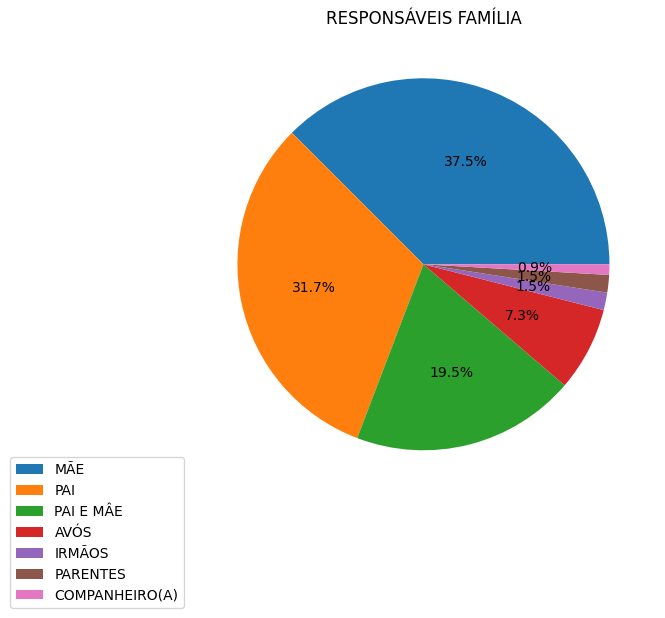

In [5]:
plot_data(dataframe=dataframe, column_to_plot='RESP_FAMILIA', dict_map=responsavel_familiar, title='RESPONSÁVEIS FAMÍLIA')

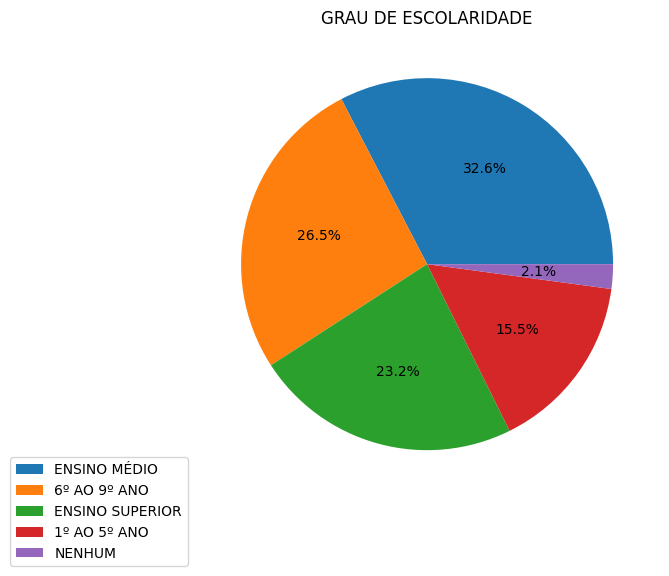

In [6]:
plot_data(dataframe=dataframe, column_to_plot='GRAU_ESCOLARIDADE', dict_map=grau_escolaridade, title='GRAU DE ESCOLARIDADE')

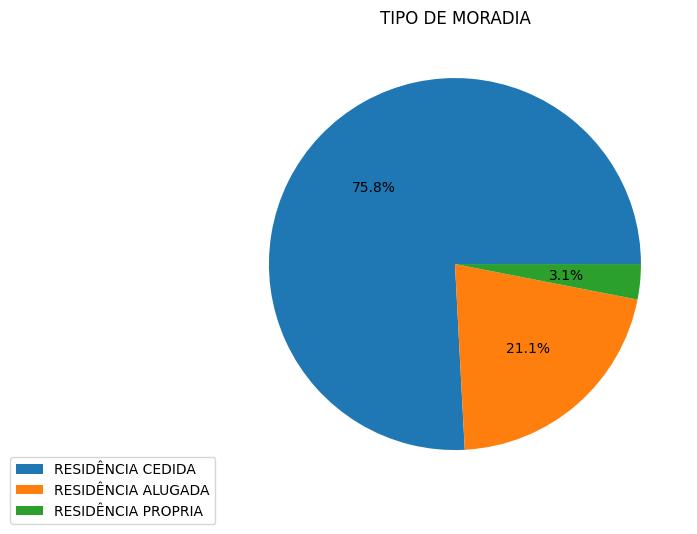

In [7]:
plot_data(dataframe=dataframe, column_to_plot='TIPO_MORADIA', dict_map=tipo_moradia, title='TIPO DE MORADIA')

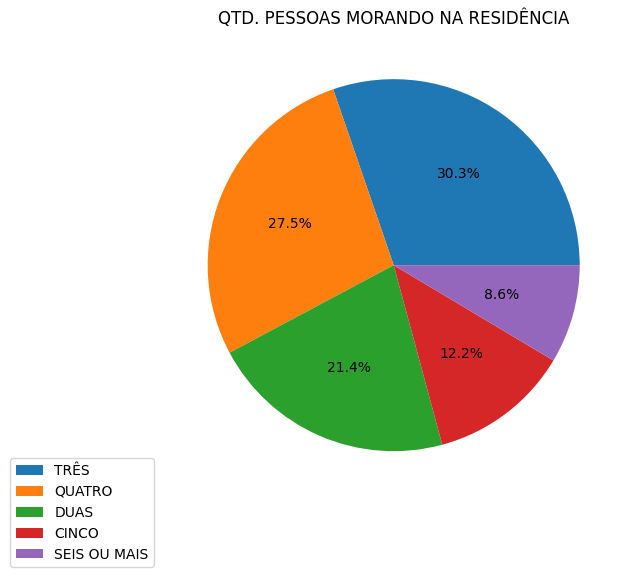

In [8]:
plot_data(
    dataframe=dataframe, 
    column_to_plot='NUM_PESSOAS_MORADIA', 
    dict_map=qtd_pessoas_casa, 
    title='QTD. PESSOAS MORANDO NA RESIDÊNCIA')

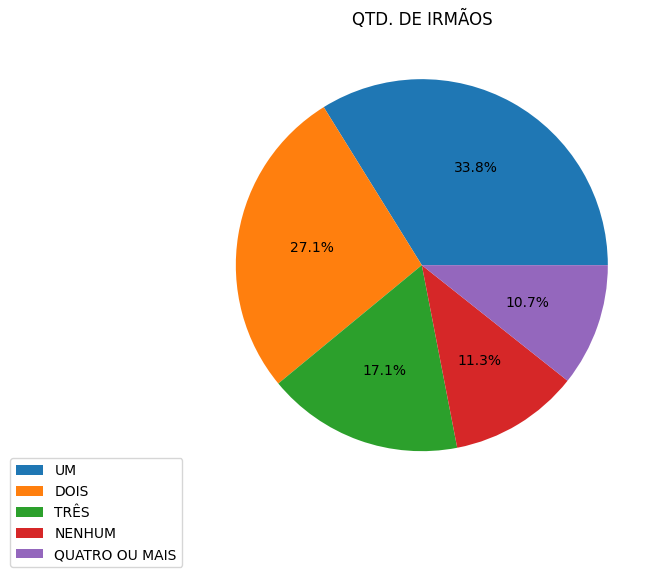

In [9]:
plot_data(
    dataframe=dataframe, 
    column_to_plot='QUANTIDADE_IRMAOS', 
    dict_map=qtd_irmaos, 
    title='QTD. DE IRMÃOS')

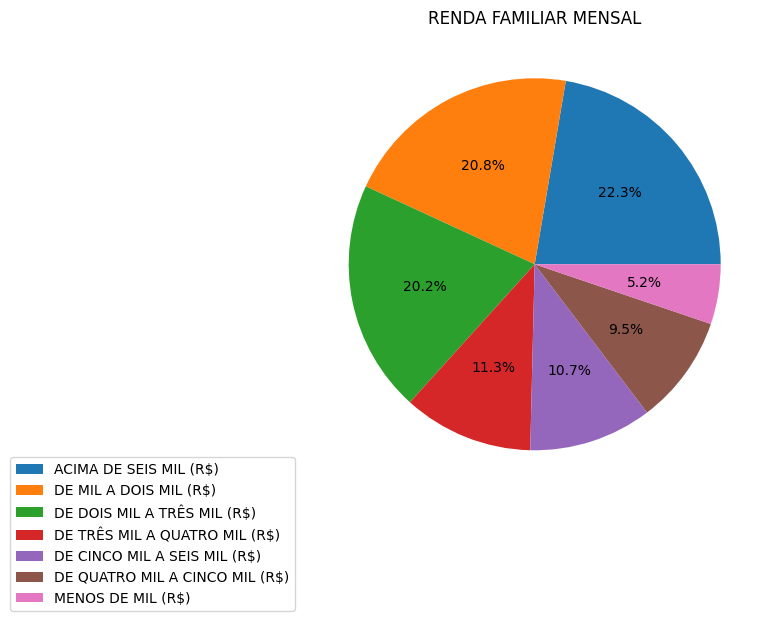

In [10]:
plot_data(
    dataframe=dataframe, 
    column_to_plot='RENDIMENTO_MENSAL', 
    dict_map=faixa_de_renda, 
    title='RENDA FAMILIAR MENSAL')

#### Verificação de correlação

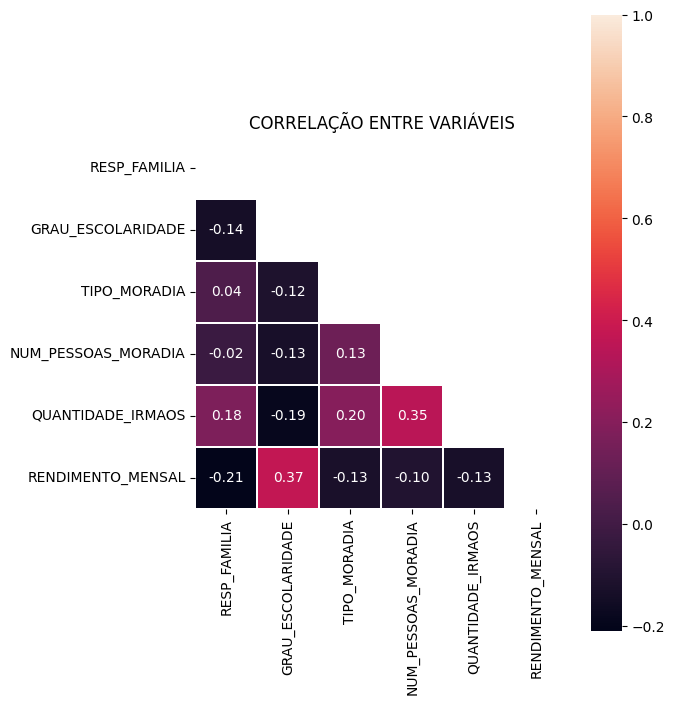

In [11]:
plot_heatmap_correlation(data=dataframe, title='CORRELAÇÃO ENTRE VARIÁVEIS')

* Qual é a média de escolaridade, quando se tem pai e mãe como responsáveis da moradia? E qual é a média de rendimento quando isso ocorre ? 

In [12]:
def create_boxplot_chart (
        data:pd.DataFrame,
        column_to_filter:str, 
        category_to_filter:int, 
        labels:list, 
        other_filter:bool=False,
        operation:str='==',
        **kwargs) -> str :
    
    expression = f"data[column_to_filter] {operation} {category_to_filter}"

    mask = eval(expression)

    if other_filter :
        data_tmp = data[mask][kwargs['second_filter']]
    else:
        data_tmp = data[mask][column_to_filter]
    
    sns.boxplot(data_tmp)
    plt.yticks(
        ticks=sorted(data_tmp.unique()),
        labels=labels
    )
    plt.show()
    

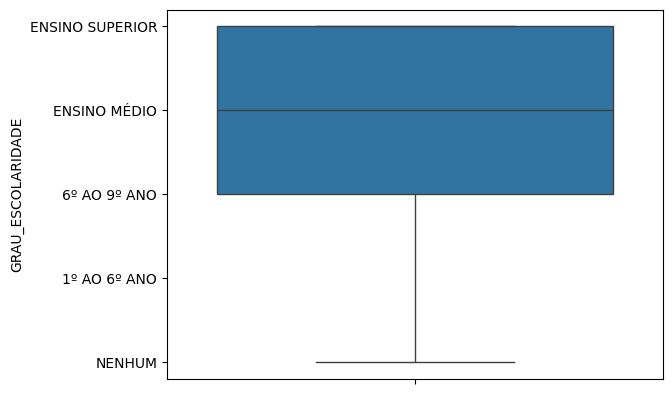

In [13]:
create_boxplot_chart(
    data=dataframe,
    column_to_filter='RESP_FAMILIA',
    category_to_filter=0,
    labels=['NENHUM', '1º AO 6º ANO', '6º AO 9º ANO','ENSINO MÉDIO','ENSINO SUPERIOR'],
    other_filter=True,
    second_filter='GRAU_ESCOLARIDADE'
)

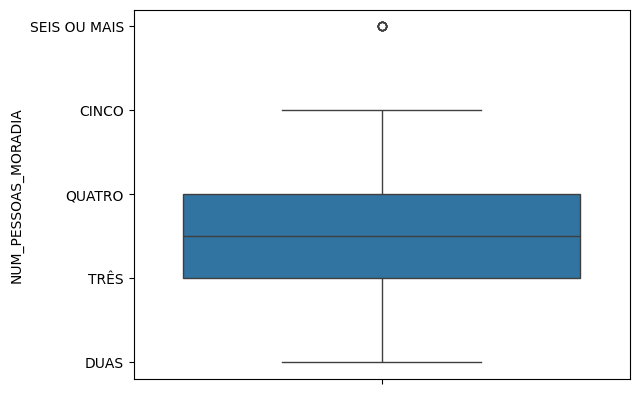

In [14]:
create_boxplot_chart(
    data=dataframe,
    column_to_filter='RESP_FAMILIA',
    category_to_filter=0,
    labels=list(qtd_pessoas_casa.keys()),
    other_filter=True,
    second_filter='NUM_PESSOAS_MORADIA'
)